In [16]:
import numpy as np
import json
from pymatgen.core.structure import Structure
from smol.io import load_work, save_work
import os
from smol.moca import Ensemble
from smol.moca import Sampler
from smol.capp.generate import generate_random_ordered_occupancy



# create cluster expansion from scratch using modules 
import sys 
sys.path.append('../Modules')
from cluster_creator import prim_entry_dataloader, cluster_subspace_creator, structure_wrangler_creator 
from eci_fitter import eci_fitter
from structure_generation import create_cca_primitive, closest_composition

In [ ]:
# get the compositions 

In [18]:
# get a list of all the ensembles in the directory 
expansion_path = '../Expansions/VCrTiWZr'

# get a list of all the ensembles in the directory
expansion_list = []
for root, dirs, files in os.walk(expansion_path):
    for file in files:
        if file.endswith('.mson'):
            expansion_list.append(os.path.join(root, file))

print(expansion_list)

['../Expansions/VCrTiWZr/Cr0_0672-Ti0_0428-Zr0_0248-W0_0289-V0_8363_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0923-Ti0_0513-Zr0_0206-W0_0322-V0_8036_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0583-Ti0_0976-Zr0_0251-W0_0597-V0_7593_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0384-Ti0_0341-Zr0_0184-W0_0949-V0_8142_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0763-Ti0_0709-Zr0_0457-W0_0178-V0_7893_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0298-Ti0_063-Zr0_0424-W0_0106-V0_8542_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0859-Ti0_0798-Zr0_0192-W0_0129-V0_8022_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0734-Ti0_0141-Zr0_0191-W0_036-V0_8574_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0254-Ti0_0756-Zr0_0165-W0_0442-V0_8383_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0863-Ti0_0643-Zr0_0423-W0_0757-V0_7314_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0846-Ti0_0657-Zr0_0445-W0_062-V0_7432_fin_work.mson', '../Expansions/VCrTiWZr/Cr0_0172-Ti0_031-Zr0_014-W0_035-V0_9028_fin_work.mson', '../Expan

In [17]:
expansion_list = ['../Expansions/VCrTiWZr/Cr0_0763-Ti0_0709-Zr0_0457-W0_0178-V0_7893_fin_work.mson']

The supercell size for the processor is 64 prims.
The ensemble has a total of 64 sites.
The active sublattices are:
Sublattice(site_space=Cr0.0672 Ti0.0428 Zr0.0248 W0.0289 V0.8363 , sites=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]), active_sites=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]), encoding=array([0, 1, 2, 3, 4]))
Sampling information: Metadata(cls_name='SampleContainer', kernels=[Metadata(seed=152373587845991930742862520852307286352, step=Metadata(sublattices=[(Element Zr, Element Ti, Element V, Element

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:49<00:00, 20407.92it/s]


Fraction of successful steps (efficiency) 0.004866
The last step energy is -579.0474405077521 eV
The minimum energy in trajectory is -579.5427966273392 eV
[-578.73612757 -578.76394343 -578.67893668 ... -578.89119783 -579.12745236
 -579.04744051]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -578.8056739929723 eV
The energy variance is 0.05362990628356829 eV^2
The sampling efficiency (acceptance rate) is approximately 0.004819481948194819
Full Formula (Zr2 Ti3 V51 Cr6 W2)
Reduced Formula: Zr2Ti3V51(Cr3W)2
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Cr    0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  Zr    0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  Cr    0     0.5   0
  9  V

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:46<00:00, 21373.97it/s]


Fraction of successful steps (efficiency) 0.005864
The last step energy is -593.8891080497806 eV
The minimum energy in trajectory is -594.3434178191562 eV
[-593.69031844 -593.83701891 -593.76894097 ... -593.65794043 -593.77934617
 -593.88910805]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -593.7489935530322 eV
The energy variance is 0.03235576338260395 eV^2
The sampling efficiency (acceptance rate) is approximately 0.005805580558055806
Full Formula (Zr2 Ti2 V52 Cr2 W6)
Reduced Formula: ZrTiV26CrW3
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  Ti    

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:47<00:00, 20967.77it/s]


Fraction of successful steps (efficiency) 0.004654
The last step energy is -571.5231321229769 eV
The minimum energy in trajectory is -572.0754862287883 eV
[-570.88544605 -570.96457687 -571.14682006 ... -571.94398474 -571.73924723
 -571.52313212]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -571.3925314543368 eV
The energy variance is 0.05562887208461204 eV^2
The sampling efficiency (acceptance rate) is approximately 0.004618461846184619
Full Formula (Zr2 Ti5 V51 Cr5 W1)
Reduced Formula: Zr2Ti5V51Cr5W
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  V   

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:46<00:00, 21456.01it/s]


Fraction of successful steps (efficiency) 0.006543
The last step energy is -582.0238879797945 eV
The minimum energy in trajectory is -582.2620975744284 eV
[-581.90761547 -581.98779454 -582.05511953 ... -581.88391583 -581.82829451
 -582.02388798]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -581.9147188131628 eV
The energy variance is 0.012920918034753629 eV^2
The sampling efficiency (acceptance rate) is approximately 0.006474647464746475
Full Formula (Zr1 Ti1 V55 Cr5 W2)
Reduced Formula: ZrTiV55Cr5W2
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  Cr  

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:43<00:00, 22981.28it/s]


Fraction of successful steps (efficiency) 0.004398
The last step energy is -584.38636383102 eV
The minimum energy in trajectory is -585.1221502279817 eV
[-583.71375327 -584.06219943 -584.34562856 ... -584.43264296 -584.29831471
 -584.38636383]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -584.2676298690171 eV
The energy variance is 0.0721381372572143 eV^2
The sampling efficiency (acceptance rate) is approximately 0.004348434843484348
Full Formula (Zr3 Ti4 V48 Cr5 W4)
Reduced Formula: Zr3Ti4V48Cr5W4
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  W     0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  Cr    0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  W     0     0.5   0
  9  Ti    

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:42<00:00, 23266.45it/s]


Fraction of successful steps (efficiency) 0.006584
The last step energy is -577.9299145403281 eV
The minimum energy in trajectory is -578.0575753598042 eV
[-577.86272009 -577.72617914 -577.61369634 ... -577.95695758 -577.68254534
 -577.92991454]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -577.7211836844073 eV
The energy variance is 0.01144623206447149 eV^2
The sampling efficiency (acceptance rate) is approximately 0.006527652765276528
Full Formula (Zr1 Ti2 V58 Cr1 W2)
Reduced Formula: ZrTi2V58CrW2
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  W     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  Cr    0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  V    

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:49<00:00, 20113.01it/s]


Fraction of successful steps (efficiency) 0.006778
The last step energy is -581.2424596854355 eV
The minimum energy in trajectory is -581.4970333522964 eV
[-581.2422948  -581.19152353 -581.24026244 ... -581.0619102  -581.16353019
 -581.24245969]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -581.192315655559 eV
The energy variance is 0.010402387295959745 eV^2
The sampling efficiency (acceptance rate) is approximately 0.0067106710671067105
Full Formula (Zr1 Ti1 V56 Cr4 W2)
Reduced Formula: ZrTiV56(Cr2W)2
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  V 

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:42<00:00, 23549.70it/s]


Fraction of successful steps (efficiency) 0.0051
The last step energy is -584.4468389963461 eV
The minimum energy in trajectory is -584.902173369617 eV
[-583.82669624 -584.56484038 -584.01161393 ... -584.15841527 -584.21099232
 -584.446839  ]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -584.2081951475113 eV
The energy variance is 0.050230872638873186 eV^2
The sampling efficiency (acceptance rate) is approximately 0.005050505050505051
Full Formula (Zr2 Ti2 V51 Cr6 W3)
Reduced Formula: Zr2Ti2V51(Cr2W)3
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  W  

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:42<00:00, 23391.42it/s]


Fraction of successful steps (efficiency) 0.005561
The last step energy is -584.8079743726912 eV
The minimum energy in trajectory is -585.4176357103776 eV
[-584.85392376 -584.64685175 -584.55519338 ... -584.95513313 -584.97965489
 -584.80797437]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -584.8741177315164 eV
The energy variance is 0.02896118034725601 eV^2
The sampling efficiency (acceptance rate) is approximately 0.0055085508550855086
Full Formula (Zr2 Ti2 V55 Cr1 W4)
Reduced Formula: Zr2Ti2V55CrW4
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Cr    0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  Ti    0     0.5   0
  9  Zr 

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:42<00:00, 23618.57it/s]


Fraction of successful steps (efficiency) 0.00586
The last step energy is -575.5463654104441 eV
The minimum energy in trajectory is -576.3643373899727 eV
[-575.76721725 -575.60882605 -575.78448412 ... -576.00997995 -575.4726458
 -575.54636541]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -575.7680966801144 eV
The energy variance is 0.02576060901469236 eV^2
The sampling efficiency (acceptance rate) is approximately 0.005797579757975797
Full Formula (Zr1 Ti3 V53 Cr6 W1)
Reduced Formula: ZrTi3V53Cr6W
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  Zr    0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  Ti    0

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:42<00:00, 23715.75it/s]


Fraction of successful steps (efficiency) 0.004407
The last step energy is -579.9155633268205 eV
The minimum energy in trajectory is -580.6616096362441 eV
[-579.42986657 -579.39719204 -579.74372066 ... -579.8979412  -579.87473847
 -579.91556333]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -579.8317216036196 eV
The energy variance is 0.06319290658639243 eV^2
The sampling efficiency (acceptance rate) is approximately 0.0043584358435843585
Full Formula (Zr3 Ti6 V49 Cr2 W4)
Reduced Formula: Zr3Ti6V49(CrW2)2
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  W     0     0     0.5
  3  Ti    0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  Ti    0     0.25  0.5
  7  W     0     0.25  0.75
  8  W     0     0.5   0
  9  

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:41<00:00, 24184.63it/s]


Fraction of successful steps (efficiency) 0.004996
The last step energy is -589.9984512521613 eV
The minimum energy in trajectory is -590.5285151362236 eV
[-589.69626937 -589.63417903 -589.89695412 ... -589.80547748 -589.66404748
 -589.99845125]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -589.7673387108171 eV
The energy variance is 0.06310227929606108 eV^2
The sampling efficiency (acceptance rate) is approximately 0.004947494749474948
Full Formula (Zr2 Ti4 V47 Cr6 W5)
Reduced Formula: Zr2Ti4V47Cr6W5
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Ti    0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  Cr    0     0.25  0
  5  Zr    0     0.25  0.25
  6  Cr    0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  Cr 

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:41<00:00, 23976.16it/s]


Fraction of successful steps (efficiency) 0.007029
The last step energy is -588.8689965850299 eV
The minimum energy in trajectory is -589.0259230009286 eV
[-588.7218076  -588.66886245 -588.68712884 ... -588.69192528 -588.79876666
 -588.86899659]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -588.7272787769527 eV
The energy variance is 0.009201848986011476 eV^2
The sampling efficiency (acceptance rate) is approximately 0.006955695569556956
Full Formula (Zr1 Ti1 V55 Cr3 W4)
Reduced Formula: ZrTiV55Cr3W4
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  W     0     0     0.5
  3  Cr    0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  V   

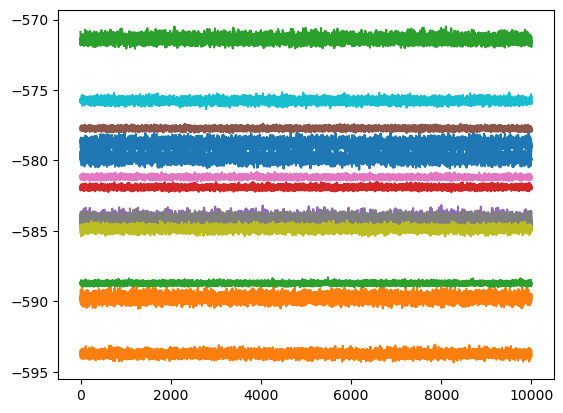

In [22]:
for i, expansion_path in enumerate(expansion_list):
    work = load_work(expansion_path)
    expansion = work['ClusterExpansion']
    # Create the ensemble
    # This specifies the size of the MC simulation domain.
    # this gives a 64 site unit cell
    sc_matrix = np.array([
        [4, 0, 0],
        [0, 4, 0],
        [0, 0, 4]
    ])
    # this convenience method will take care of creating the appropriate
    # processor for the given cluster expansion.
    #os.environ['OMP_NUM_THREADS'] = '4'
    ensemble = Ensemble.from_cluster_expansion(expansion, sc_matrix)
    ensemble.processor.num_threads_full = 5

    # In a real scenario you may want a much larger processor.size
    # An MC step is O(1) with the processor.size, meaning it runs at
    # the same speed regardless of the size. However, larger sizes
    # will need many more steps to reach equilibrium in an MC simulation.
    print(f'The supercell size for the processor is {ensemble.processor.size} prims.')
    print(f'The ensemble has a total of {ensemble.num_sites} sites.')
    print(f'The active sublattices are:')
    for sublattice in ensemble.sublattices:
        print(sublattice)


    # here we also set the temperature to our operating temperature, in V-Cr-Ti this should be around 900K 
    T_sample = 973.15
    sampler = Sampler.from_ensemble(ensemble, temperature=T_sample)
    print(f"Sampling information: {sampler.samples.metadata}")
    compositions = [sublattice.composition for sublattice in ensemble.sublattices]

    print(dir(sublattice))
    compositions = [sublattice.composition for sublattice in ensemble.sublattices]
    print(f'The compositions are {compositions}')
    try:
        # this will raise an error if the ensemble is not ordered
        init_occu = generate_random_ordered_occupancy(processor= ensemble.processor,
                                                    composition=compositions,
                                                    tol = 0.99,
                                                    rng=42)
    except:
        #raise ValueError('The ensemble is not ordered, please check the ensemble and try again.')
        print('The ensemble is not ordered, please check the ensemble and try again.')
        continue
    #init_occu = generate_random_ordered_occupancy(processor= ensemble.processor,
                                                #composition=compositions,
                                                #tol = 0.99,
                                                #rng=42)

    print(f"The disordered structure has composition: {ensemble.processor.structure.composition}")
    print(f"The initial occupancy has composition: {ensemble.processor.structure_from_occupancy(init_occu).composition}")

    print(f'The encoded occupancy is:\n{init_occu}')
    print(f'The initial occupancy is:\n {ensemble.processor.decode_occupancy(init_occu)}')

    # run 1M iterations
    # since this is the first run, the initial occupancy must be supplied
    sampler.run(
        1000000,
        initial_occupancies=init_occu,
        thin_by=100, # thin_by will save every 100th sample only
        progress=True
    ) # progress will show progress bar

    # Samples are saved in a sample container
    samples = sampler.samples

    print(f'Fraction of successful steps (efficiency) {sampler.efficiency()}')
    print(f'The last step energy is {samples.get_energies()[-1]} eV')
    print(f'The minimum energy in trajectory is {samples.get_minimum_energy()} eV')

    # You can get the minimum energy structure and current structure
    # by using the ensemble processor
    curr_s = ensemble.processor.structure_from_occupancy(samples.get_occupancies()[-1])
    min_s = ensemble.processor.structure_from_occupancy(samples.get_minimum_energy_occupancy())

    #from smol.moca.analysis.convergence import check_property_converged, determine_discard_number

    energies = samples.get_energies()
    # 100 as an initial guess for amount to discard
    #opt_discard = determine_discard_number(property_array=energies, init_discard=100, verbose=True)
    #converged = check_property_converged(energies[opt_discard:])
    #print(f'Is the energy converged after discarding the first {opt_discard} samples?', converged)
    print(energies)

    # let's plot the energy trajectories over time 

    import matplotlib.pyplot as plt
    runs = np.arange(len(energies))
    plt.plot(runs, energies)

    # Set 100 samples for burn-in, as determined in 5)
    discard = 100 # this is in terms of samples so it would be discard*thin_by steps
    print(f'A total of {len(samples)} samples taken.')
    print(f'A total of {len(samples.get_energies(discard=discard))} samples used for production.')
    print(f'The average energy is {samples.mean_energy(discard=discard)} eV')
    print(f'The energy variance is {samples.energy_variance(discard=discard)} eV^2')
    print(f'The sampling efficiency (acceptance rate) is approximately {samples.sampling_efficiency(discard=discard)}')


    #write these to cif files
    from pymatgen.io.cif import CifWriter
    structure_path = '../Visualization/Job_Structures'

    initial_structure = samples.get_sampled_structures(indices=[0])[0]
    print(initial_structure)

    # ChANGE THE NAME 
    # get the composition of the structure
    composition = initial_structure.composition.reduced_formula

    # Find the start and end of the substring
    start = expansion_path.find('VCrTiWZr/') + len('VCrTiWZr/')
    end = expansion_path.find('_fin_work.mson')

    # Extract the substring
    substring = expansion_path[start:end]

    # write the initial structure to a CIF file
    cif = CifWriter(initial_structure)
    total_initial_path = os.path.join(structure_path, substring + '_initial.cif')
    cif.write_file(total_initial_path)

    # print the last structure 
    final_structure = samples.get_sampled_structures(indices=[-1])[0]
    print(final_structure)

    # write the final structure to a CIF file
    cif = CifWriter(final_structure)
    total_final_path = os.path.join(structure_path, substring + '_final.cif')
    cif.write_file(total_final_path)
    
    # save the Sample container with the same name 
    total_sample_path = os.path.join(structure_path, substring + '_samples.mson')
    save_work(total_sample_path,samples)
